# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint as pprint

pp = pprint.PrettyPrinter(indent=4)


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temp1 = []
lat1 = []
city_in1  = []
cloudiness1 = []
country1 = []
date1 = []
humidity1 = []
lng1 = []
wind = []


i = 0
print("Beginning Data Retrieval")
print("------------------------")
    
# USE TRY AND EXCEPTION HERE TO SKIP CITIES THAT ARE NOT IN THE WEAHTER LIST 

for city in cities:
        target_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        try:
            weather_response = requests.get(target_url)
            weather_json = weather_response.json()
            temp1.append(weather_json["main"]["temp"])
            lat1.append(weather_json["coord"]["lat"])
            city_in1.append(weather_json["name"])
            cloudiness1.append(weather_json["clouds"]["all"])
            country1.append(weather_json["sys"]["country"])
            date1.append(weather_json["dt"])
            humidity1.append(weather_json["main"]["humidity"])
            lng1.append(weather_json["coord"]["lon"])
            wind.append(weather_json["wind"]["speed"])
            print(f"Processing Record {i} | {city}")
            i+=1
        
        except (KeyError, NameError):
            print("Woops we dont have that city. Skipping... ")
            continue
            


Beginning Data Retrieval
------------------------
Processing Record 0 | albany
Processing Record 1 | mataura
Processing Record 2 | butaritari
Processing Record 3 | ushuaia
Processing Record 4 | rikitea
Processing Record 5 | mazamari
Processing Record 6 | taclobo
Processing Record 7 | hithadhoo
Processing Record 8 | arroyo
Processing Record 9 | nikolskoye
Processing Record 10 | camacha
Processing Record 11 | noshiro
Woops we dont have that city. Skipping... 
Processing Record 12 | east london
Processing Record 13 | jamestown
Processing Record 14 | souillac
Processing Record 15 | port alfred
Processing Record 16 | punta arenas
Woops we dont have that city. Skipping... 
Processing Record 17 | brigantine
Processing Record 18 | westerland
Processing Record 19 | xingcheng
Processing Record 20 | santa isabel do rio negro
Processing Record 21 | bredasdorp
Processing Record 22 | bani walid
Processing Record 23 | tual
Processing Record 24 | novosibirsk
Processing Record 25 | port elizabeth
Woops

Processing Record 215 | auki
Processing Record 216 | richards bay
Woops we dont have that city. Skipping... 
Processing Record 217 | lagoa
Processing Record 218 | diffa
Processing Record 219 | muli
Processing Record 220 | dali
Processing Record 221 | kodiak
Processing Record 222 | ormara
Processing Record 223 | negru voda
Processing Record 224 | georgetown
Processing Record 225 | tautira
Processing Record 226 | chifeng
Processing Record 227 | luderitz
Processing Record 228 | bonthe
Processing Record 229 | katsuura
Processing Record 230 | ust-tsilma
Woops we dont have that city. Skipping... 
Processing Record 231 | wiarton
Processing Record 232 | sitka
Processing Record 233 | acajutla
Processing Record 234 | vila velha
Processing Record 235 | kieta
Processing Record 236 | hermitage
Processing Record 237 | nymburk
Processing Record 238 | comodoro rivadavia
Processing Record 239 | klyuchi
Processing Record 240 | bowen
Processing Record 241 | astolfo dutra
Processing Record 242 | santa cla

Processing Record 426 | sayat
Processing Record 427 | udachnyy
Woops we dont have that city. Skipping... 
Processing Record 428 | vestmannaeyjar
Processing Record 429 | batemans bay
Processing Record 430 | namuac
Woops we dont have that city. Skipping... 
Processing Record 431 | lakes entrance
Processing Record 432 | berezovyy
Processing Record 433 | berdigestyakh
Processing Record 434 | uribia
Woops we dont have that city. Skipping... 
Processing Record 435 | boralday
Processing Record 436 | aparecida do taboado
Processing Record 437 | vila franca do campo
Processing Record 438 | saint george
Processing Record 439 | senador jose porfirio
Processing Record 440 | svetlaya
Processing Record 441 | erenhot
Processing Record 442 | klaksvik
Woops we dont have that city. Skipping... 
Processing Record 443 | nyurba
Processing Record 444 | takhatgarh
Processing Record 445 | port hardy
Processing Record 446 | otofuke
Processing Record 447 | praia
Processing Record 448 | mercedes
Woops we dont ha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
weather_df = pd.DataFrame({
    "City": city_in1,
    "Cloudiness": cloudiness1,
    "Country": country1,
    "Date": date1,
    "Humidity": humidity1,
    "Lat": lat1,
    "Lng": lng1,
    "Max Tempature": temp1,
    "Wind Speed": wind
    
})

NameError: name 'pd' is not defined

NameError: name 'weather_df' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

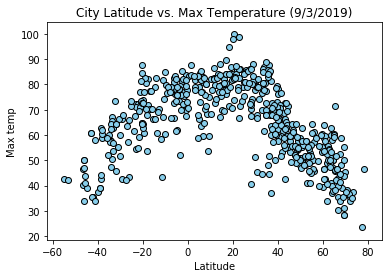

In [27]:
j = 0

for j in np.arange(0,534):
    y_axis1 = weather_df["Max Tempature"][j]
    x_axis1 = weather_df["Lat"][j]
    Scatterplot1 = plt.scatter(x_axis1, y_axis1, marker="o", facecolors = 'skyblue', edgecolors="black")

#plt.xlim(-80,100)
#plt.ylim(0,120)

plt.title("City Latitude vs. Max Temperature (9/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max temp")
plt.grid(b = 0)


plt.show()

#### Latitude vs. Humidity Plot

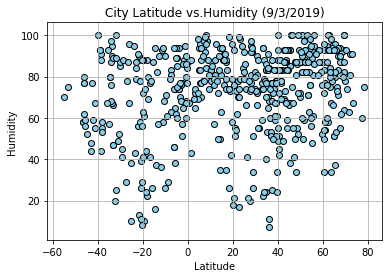

In [22]:
k = 0

for k in np.arange(0,534):
    y_axis2 = weather_df["Humidity"][k]
    x_axis2 = weather_df["Lat"][k]
    Scatterplot2 = plt.scatter(x_axis2, y_axis2, marker="o", facecolors = 'skyblue', edgecolors="black")


x_limit2 = np.arange(-60,80)
y_limit2 = np.arange(10,100)
#plt.xlim(x_limit2)
#plt.ylim(y_limit2)

plt.title("City Latitude vs.Humidity (9/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()


plt.show()

#### Latitude vs. Cloudiness Plot

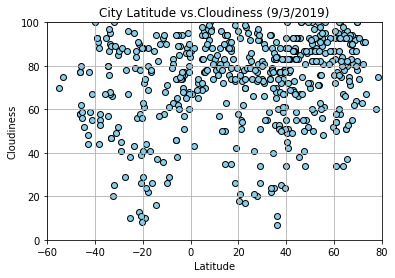

In [30]:
u = 0

for u in np.arange(0,534):
    y_axis3 = weather_df["Humidity"][u]
    x_axis3 = weather_df["Lat"][u]
    Scatterplot2 = plt.scatter(x_axis3, y_axis3, facecolors = 'skyblue', edgecolors="black")

plt.xlim(-60,80)
plt.ylim(0,100)

plt.title("City Latitude vs.Cloudiness (9/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()


plt.show()

#### Latitude vs. Wind Speed Plot

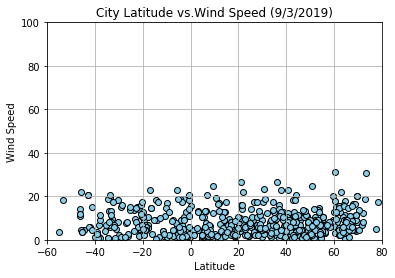

In [32]:
z = 0

for z in np.arange(0,534):
    y_axis3 = weather_df["Wind Speed"][z]
    x_axis3 = weather_df["Lat"][z]
    Scatterplot2 = plt.scatter(x_axis3, y_axis3, facecolors = 'skyblue', edgecolors="black")


plt.title("City Latitude vs.Wind Speed (9/3/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()


plt.show()